<a href="https://colab.research.google.com/github/aswinkj2006/RUN/blob/main/Trios_Internship_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **CSAT Analysis**




##### **Project Type**    - Data Analysis ( EDA )
##### **Contribution**    - Team

##### **Team Member 1 - Aswin K J**
##### **Team Member 2 - Aravinth P**
##### **Team Member 3 - Bavish M A**
##### **Team Member 4 - Barath**
##### **Team Member 5 - Megha S B**
##### **Team Member 6 - Mirula A**

# **Project Summary**

### The customer service data given to us was thoroughly analyzed using Python, leveraging libraries like Matplotlib and Seaborn. The focus was on key aspects such as Agents, Managers, Supervisors, Tenure Buckets, Shifts, and Response Times.

## Key Findings:

* **Overall CSAT Distribution:** The majority of CSAT scores are at the highest level (5), but there’s also a notable number of 1-star ratings, showing a polarization in customer sentiment. Scores of 4, 3, and 2 follow a mixed trend, indicating a wide range of customer experiences.

* **Response Time:** A clear pattern shows that quicker responses tend to receive better CSAT scores. As response time increases, satisfaction generally decreases, emphasizing the need to respond faster to enhance customer experience.

* **Channel of Communication:** Email-based support consistently receives lower average CSAT scores compared to Outcall and Inbound channels. This highlights the need to improve email support processes or train agents better in handling email communications.

* **Agent Performance:** There’s a strong difference between high and low-performing agents in terms of CSAT. Identifying and supporting low performers with the right training is crucial to boost overall satisfaction levels.

* **Manager Performance:** Most managers maintain decent CSAT scores, but a few fall short. Understanding the practices of lower-scoring managers could uncover gaps and offer opportunities for leadership improvement.

* **Agent Tenure Buckets:** "On Job Training" agents have the highest 1-star score ratio and the lowest 5-star ratio. Interestingly, agents with a "61-90" day tenure perform best, showing the lowest 1-star and highest 5-star ratios. Agents with over 90 days of experience surprisingly show a slight uptick in 1-star ratings, pointing to the need for ongoing support and supervision, even for seasoned agents.

* **Shifts:** The Morning and Evening shifts handle the most volume and also show high counts of 1-star CSATs. Strategically placing top-performing agents during these shifts could significantly reduce negative feedback and improve overall scores.

* **Handling Time:** Quick interactions sometimes lead to low CSAT, likely due to incomplete resolutions. However, longer durations don’t always guarantee satisfaction either. This shows that resolution quality matters more than speed. Both new and experienced agents were found contributing to low CSATs in short interactions, suggesting the need to focus on problem resolution skills.

* **Supervisor Analysis (Oliver Nguyen Example):** A closer look at agents under Oliver Nguyen, a supervisor with below-average CSAT, revealed that while some agents performed well, others dragged down the team’s overall performance. This underlines the value of targeted agent training and potentially some supervisory coaching to elevate team outcomes.

* **Additional Research:** Deeper investigation into supervisors and agents within the >90-day Tenure Bucket pointed out exactly which individuals need support the most. Prioritizing their training and mentorship could have a strong positive impact on CSAT trends.

## Conclusion:

Improving CSAT score demands a well-rounded approach. Speeding up response times, enhancing the email channel, giving personalized support to underperforming agents, shifting top talent to high-volume shifts, and focusing on the quality of resolutions are all essential steps. Continued supervision and tailored training for both new and experienced agents will be key to driving long-term improvement in customer satisfaction.


# **Problem Statement**


The objective of this project is to analyze customer support interaction data from the given data in order to identify key factors influencing Customer Satisfaction (CSAT) scores. The goal is to uncover actionable insights related to agent performance, response and handling times, tenure, shift timings, support channels, and supervisory impact. By understanding the patterns and drivers behind low and high CSAT ratings, this analysis aims to recommend data-driven strategies to improve overall service quality, optimize support workflows, and enhance customer experience across the platform.



# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset
# Make sure to import Customer_support_data.csv into the Files Section
df = pd.read_csv(r'/content/Customer_support_data.csv')


### Dataset First View

In [3]:
# Dataset First Look
df.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01-08-23 11:13,01-08-23 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01-08-23 12:52,01-08-23 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01-08-23 20:16,01-08-23 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01-08-23 20:56,01-08-23 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01-08-23 10:30,01-08-23 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
df.shape

(85907, 20)

### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
Unique id,0
channel_name,0
category,0
Sub-category,0
Customer Remarks,57165
Order_id,18232
order_date_time,68693
Issue_reported at,0
issue_responded,0
Survey_response_Date,0


### What did you know about your dataset?

The dataset consists of customer service interaction records from the given dataset, each representing a ticket raised by a customer. It contains 85907 entries and includes both quantitative and qualitative data relevant to customer satisfaction.

Key things we observed:

* **Target Variable:** The main variable of interest is the **CSAT Score**, which ranges from **1 (very dissatisfied)** to **5 (very satisfied)**.

* **Time-Based Fields:** It has timestamps like `Issue_reported_at` and `Issue_responded`, which can be used to calculate **response time**, and a `connected_handling_time` field indicating how long agents handled the ticket.

* **Agent Information:** The dataset contains details about agents such as **Agent Name**, **Supervisor**, **Manager**, **Shift**, and **Tenure Bucket**, which help evaluate performance at different hierarchy levels.

* **Customer and Channel Info:** It includes the **channel of communication** (Email, Inbound, Outcall), **city**, and **product category**, giving more dimensions to analyze satisfaction patterns.

* **Imbalanced CSAT Distribution:** CSAT scores are **heavily skewed toward 5**, but there is still a significant volume of ratings at the lowest score (1), indicating service inconsistency.

In summary, the dataset is well-suited for exploratory analysis, pattern recognition, and performance benchmarking across service channels, agents, and time-related metrics to uncover what drives customer satisfaction in the company



## ***2. Understanding Your Variables***

In [8]:
# Dataset Columns
df.columns

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')

In [9]:
# Dataset Describe
df.describe()

,Item_price,connected_handling_time,CSAT Score
count,17206.000000,242.000000,85907.000000
mean,5660.774846,462.400826,4.242157
std,12825.728411,246.295037,1.378903
min,0.000000,0.000000,1.000000
25%,392.000000,293.000000,4.000000
50%,979.000000,427.000000,5.000000
75%,2699.750000,592.250000,5.000000
max,164999.000000,1986.000000,5.000000


### Variables Description

| **Column Name**           | **Description**                                                              |
| ------------------------- | ---------------------------------------------------------------------------- |
| `Unique id`               | A unique identifier for each support interaction/ticket                      |
| `channel_name`            | Channel through which the issue was reported (e.g., Email, Inbound, Outcall) |
| `category`                | Broad category of the issue (e.g., Returns, Order Related)                   |
| `Sub-category`            | More specific description of the issue                                       |
| `Customer Remarks`        | Free-text feedback left by the customer after the interaction                |
| `Order_id`                | ID of the related order, if applicable                                       |
| `order_date_time`         | Timestamp of when the order was placed                                       |
| `Issue_reported at`       | Timestamp of when the customer raised the issue                              |
| `issue_responded`         | Timestamp of when the issue was first responded to by an agent               |
| `Survey_response_Date`    | Date when the customer gave the CSAT feedback                                |
| `Customer_City`           | City from which the customer reached out                                     |
| `Product_category`        | Type of product involved in the issue                                        |
| `Item_price`              | Price of the product related to the issue                                    |
| `connected_handling_time` | Time (in minutes) that the agent spent handling the ticket                   |
| `Agent_name`              | Name of the support agent who handled the case                               |
| `Supervisor`              | Supervisor assigned to the agent                                             |
| `Manager`                 | Manager overseeing the agent’s team                                          |
| `Tenure Bucket`           | Agent experience range in days (e.g., 0-30, 61-90, >90)                      |
| `Agent Shift`             | Shift during which the agent handled the ticket (Morning, Evening, Night)    |
| `CSAT Score`              | Customer Satisfaction rating (1 to 5)                                        |


### Check Unique Values for each variable.

In [10]:
# Check Unique Values for each variable.
df.nunique().sort_values(ascending=False)

,0
Unique id,85907
Order_id,67675
Issue_reported at,30923
issue_responded,30262
Customer Remarks,18231
order_date_time,13766
Item_price,2789
Customer_City,1782
Agent_name,1371
connected_handling_time,211


## 3. ***Data Wrangling***

### Data Wrangling Code

In [11]:
# Write your code to make your dataset analysis ready.

#change all date to datetime type

df['issue_reported_at'] = pd.to_datetime(df['Issue_reported at'], errors='coerce')
df['issue_responded'] = pd.to_datetime(df['issue_responded'], errors='coerce')
df['response_time_mins'] = (df['issue_responded'] - df['issue_reported_at']).dt.total_seconds() / 60
df = df[df['response_time_mins'] >= 0]
df = df[df['response_time_mins'] < 10000]

df_filtered = df[['CSAT Score', 'channel_name', 'category', 'Sub-category',
                  'response_time_mins','connected_handling_time', 'Agent_name', 'Supervisor', 'Manager',
                  'Tenure Bucket', 'Agent Shift', 'Item_price']]

### What all manipulations have you done and insights you found?

#### **Data Manipulations Performed:**

1. **Datetime Conversion:**

   * Converted the `Issue_reported at` and `issue_responded` columns to proper `datetime` format using `pd.to_datetime()`.
   * This enabled accurate time-based analysis.

2. **Response Time Calculation:**

   * Created a new column `response_time_mins` by calculating the time difference between when the issue was reported and when it was responded to.
   * Converted the time difference into minutes.

3. **Filtered Invalid/Extreme Data:**

   * Removed rows where `response_time_mins` was negative (indicating data entry errors).
   * Removed outliers where `response_time_mins` was greater than 10,000 minutes (\~7 days), which skewed the graphs.

4. **Selected Relevant Columns:**

   * Created a filtered dataset (`df_filtered`) containing only the columns necessary for CSAT analysis, such as:

     * `CSAT Score`, `response_time_mins`, `connected_handling_time`, `Agent_name`, `Tenure Bucket`, etc.

---

#### **Insights Found:**

1. **Required Datasets:**

  * The required datas are CSAT, Response Time, Handling Time,Agent, Manager, Supervisor, Tenure Bucket, Agent Shift and few others

2. **Response Time:**

  * The Difference Between Reported and Responded Time will give the Response Time
  
  * Response Time shall play a crucial time in finding out CSAT scores.

  * It was filtered since the data had both negative and greater than 10,000 minute time frames.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### **1. CSAT Score Plot**

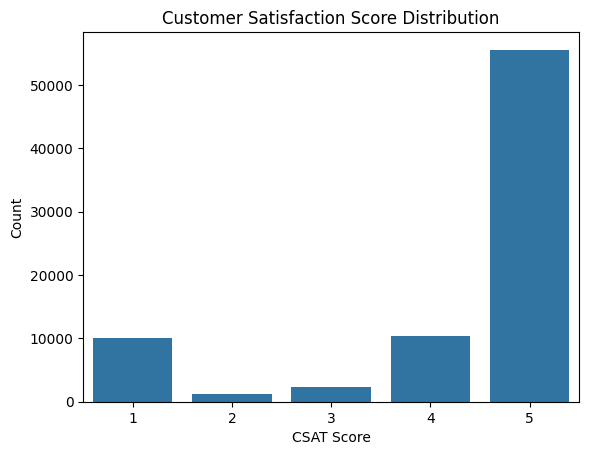

In [12]:
sns.countplot(x='CSAT Score', data=df)
plt.title("Customer Satisfaction Score Distribution")
plt.xlabel("CSAT Score")
plt.ylabel("Count")
plt.show()

##### 1. Why did you pick the specific chart?

We chose the countplot because it provides a simple and clear visual of how CSAT scores are distributed across all customer support interactions. It allows us to quickly identify whether the ratings are skewed toward satisfaction or dissatisfaction, which is essential for measuring overall customer sentiment.



##### 2. What is/are the insight(s) found from the chart?

The chart showed that most customers gave a CSAT score of 5, indicating high satisfaction. However, there was also a notable number of 1-star ratings, suggesting that while many interactions are successful, there are recurring issues leading to very poor experiences for some customers which is a sign of polarized satisfaction.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights are impactful. Knowing that the majority of customers are highly satisfied confirms that the support team is generally effective. However, the presence of many 1-star ratings points to inconsistencies. If left unchecked, these could damage brand loyalty and lead to churn a negative growth factor. Identifying the root causes behind those low scores (e.g., response time, handling quality, agent behavior) and fixing them can directly improve customer retention and trust.

#### **2. Impact of CSAT w.r.t Response Time (Box Plot)**

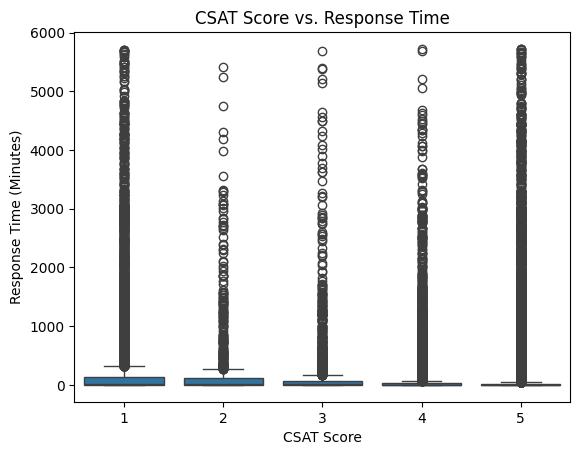

In [13]:
sns.boxplot(x='CSAT Score', y='response_time_mins', data=df)
plt.title("CSAT Score vs. Response Time")
plt.xlabel("CSAT Score")
plt.ylabel("Response Time (Minutes)")
plt.show()

##### 1. Why did you pick the specific chart?

We chose this boxplot because it effectively shows how response time (in minutes) varies across different CSAT scores. It provides a compact summary of the median, spread, and outliers for each score level. This helps us clearly observe whether customers who waited longer gave lower ratings which is essential for evaluating the responsiveness of the support team.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that:

* CSAT 1 ratings have a noticeably higher spread in response times, with many outliers stretching into the 4000–6000 minute range.

* On the other hand, CSAT 5 scores tend to have lower median response times, with fewer extreme delays.

* This suggests a negative correlation between response time and customer satisfaction. As response time increases, CSAT scores tend to decrease.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.`

Yes, this insight is highly actionable. By reducing response times especially for delayed tickets, the support team can potentially reduce the number of low (1-star) CSAT ratings, improving customer experience and loyalty.

Ignoring this insight could lead to negative growth, as delayed responses may drive customers toward frustration and churn. Consistent 1-star ratings could damage brand reputation, increase returns/cancellations, and weaken repeat purchase behavior.

#### **3. Impact of CSAT w.r.t Response Time (Regression Plot)**

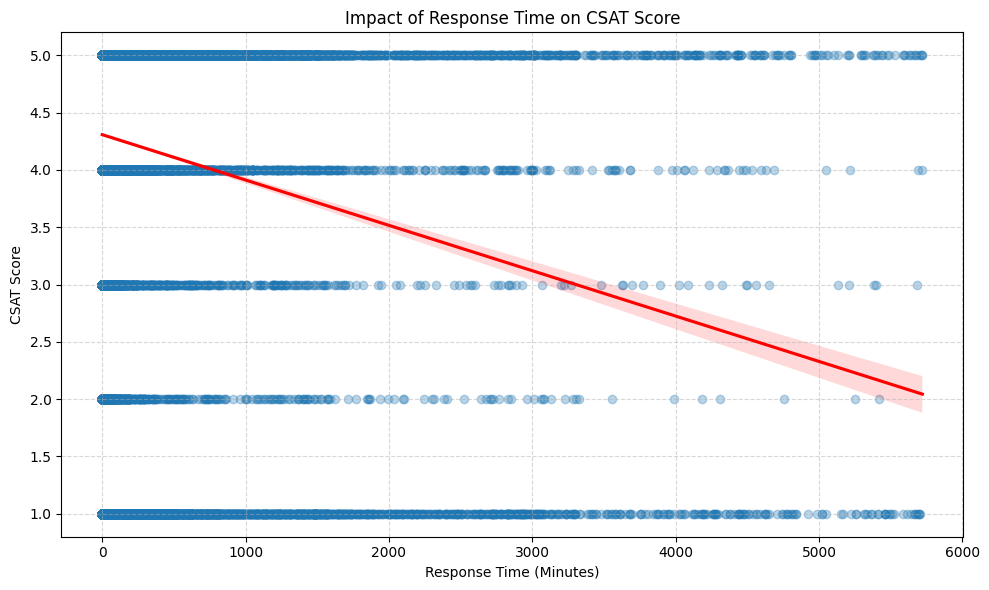

In [14]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='response_time_mins', y='CSAT Score',
            scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
plt.title('Impact of Response Time on CSAT Score')
plt.xlabel('Response Time (Minutes)')
plt.ylabel('CSAT Score')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a regression plot because it helps visualize the overall trend and correlation between response time and CSAT score. Unlike a boxplot or scatter plot alone, the regression line gives a clear indication of whether CSAT increases or decreases as response time changes. This makes it easier to interpret directional relationships between variables.

##### 2. What is/are the insight(s) found from the chart?

The chart shows a negative slope in the regression line, indicating that as response time increases, CSAT score tends to decrease. Although there is some variation and noise in the data, the overall trend suggests that customers are generally less satisfied when they have to wait longer for a response. This validates the assumption that fast responses contribute to a better support experience.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insight can create a strong positive business impact. By optimizing support workflows to reduce response times, The company can potentially improve CSAT scores, leading to happier customers, stronger loyalty, and better brand perception.

On the flip side, ignoring this insight can lead to negative growth as customers facing long wait times may leave low ratings, escalate complaints, or even stop using the platform. Addressing slow response tickets can prevent such outcomes and drive meaningful improvements.

#### **4. Impact of CSAT w.r.t Channel**

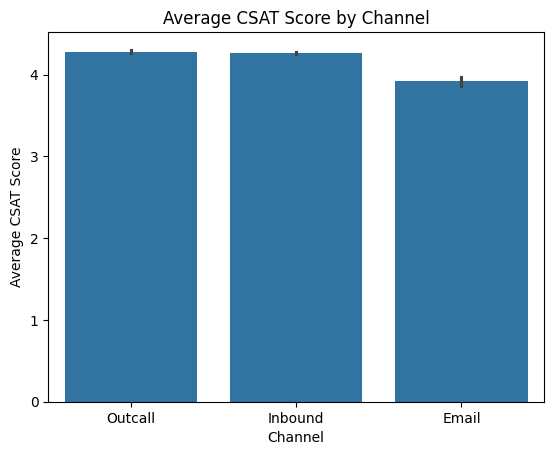

In [15]:
sns.barplot(x='channel_name', y='CSAT Score', data=df)
plt.title("Average CSAT Score by Channel")
plt.xlabel("Channel")
plt.ylabel("Average CSAT Score")
plt.show()

##### 1. Why did you pick the specific chart?

We chose barplot because it provides a clear, simple comparison of the average CSAT scores across different customer support channels. It helps quickly identify which channels are performing well and which ones are falling behind in terms of customer satisfaction. A barplot is ideal here because the number of categories is small, and we’re comparing mean values.

##### 2. What is/are the insight(s) found from the chart?

The chart revealed that:

* Outcall and Inbound channels have higher average CSAT scores.

* Email support has a noticeably lower average CSAT, indicating that customers are less satisfied when using this channel.

* This suggests that real-time or voice-based communication leads to better customer experiences compared to asynchronous ones like email.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight is very useful for improving customer experience. If the company can optimize or upgrade its email support process through better templates, faster replies, or more personalized service. It can reduce low CSAT ratings and align email performance with other channels.

On the other hand, if the email channel continues to underperform, it could become a pain point for customers, especially those who rely on it as their primary mode of support. This may lead to negative reviews, escalations, or customer churn contributing to negative growth.

#### **5. Impact of CSAT w.r.t Bottom Agents Perfomance**

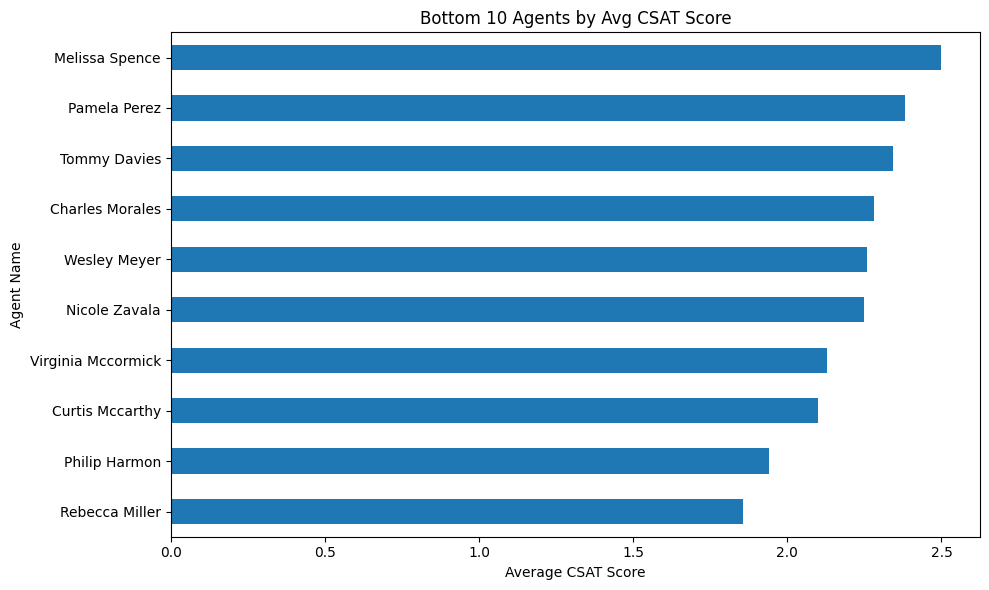

In [16]:
# Group by Agent_name and calculate the mean CSAT Score
agent_csat = df.groupby('Agent_name')['CSAT Score'].mean()

# Sort in ascending order to find bottom performers and select the top 10
bottom_agents = agent_csat.sort_values(ascending=True).head(10)

# Create a horizontal bar plot for the bottom 10 agents
plt.figure(figsize=(10, 6))
bottom_agents.plot(kind='barh')
plt.title('Bottom 10 Agents by Avg CSAT Score')
plt.xlabel('Average CSAT Score')
plt.ylabel('Agent Name')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

We chose horizontal bar chart to clearly visualize the bottom 10 agents based on their average CSAT scores. Horizontal bars make it easier to read long agent names and directly compare their performance. This chart quickly highlights underperforming agents who may need attention, support, or retraining.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals a clear gap in performance among the bottom agents:

* These agents consistently receive lower average CSAT scores, often below 3.

* This could be due to lack of experience, poor communication, or inadequate handling of customer issues.

* The consistency in low scores suggests that the issue may not be one-off, but part of a recurring pattern.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can be used to create a positive impact by:

* Identifying agents who need targeted training or mentoring

* Monitoring improvement over time to ensure quality standards are met

If these insights are ignored, the underperformance may continue, leading to:

* More 1-star ratings

* Customer dissatisfaction

* Overall decline in brand trust, all of which contribute to negative growth

#### **6. Impact of CSAT w.r.t Top Agents Perfomance**

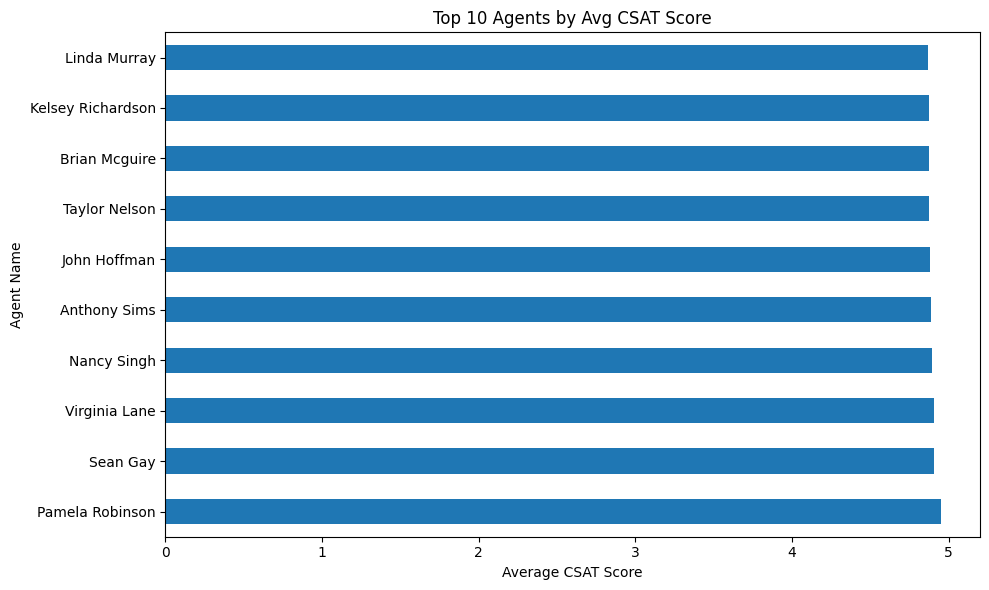

In [17]:
# Sort in descending order to find top performers and select the top 10
top_agents = agent_csat.sort_values(ascending=False).head(10)

# Create a horizontal bar plot for the top 10 agents
plt.figure(figsize=(10, 6))
top_agents.plot(kind='barh')
plt.title('Top 10 Agents by Avg CSAT Score')
plt.xlabel('Average CSAT Score')
plt.ylabel('Agent Name')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

We chose horizontal bar chart to display the top 10 agents ranked by their average CSAT scores. This format is ideal for showing performance rankings, especially when agent names are long. It clearly highlights which agents are consistently delivering high customer satisfaction, making it easy to recognize top performers.`

##### 2. What is/are the insight(s) found from the chart?

The chart shows that these top 10 agents have maintained average CSAT scores close to 5, indicating:

* High levels of customer satisfaction

* Consistent service quality

* Possibly better issue resolution skills or communication styles

These agents serve as benchmarks for performance and can provide best practices or peer training to others.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight can help create a positive business impact by:

* Recognizing and rewarding top performers, which boosts morale

* Leveraging their techniques to train lower-performing agents

* Encouraging a culture of excellence and consistency

Ignoring top performers might lead to demotivation or attrition, which could negatively impact team performance and growth over time. So celebrating these agents also helps in retaining talent and sustaining high CSAT scores.

#### **7. Impact of CSAT w.r.t Manager Perfomance**

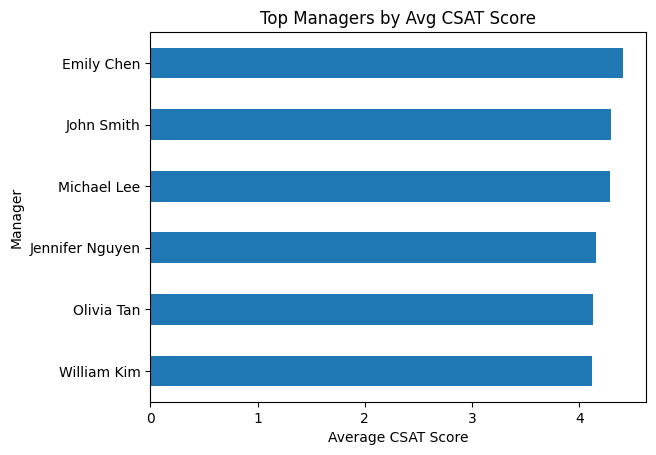

In [18]:
#5. Manager Perfomance

top_managers = df.groupby('Manager')['CSAT Score'].mean().sort_values(ascending=True).head(6)
top_managers.plot(kind='barh')
plt.title('Top Managers by Avg CSAT Score')
plt.xlabel('Average CSAT Score')
plt.ylabel('Manager')
plt.show()

##### 1. Why did you pick the specific chart?

We chose horizontal bar chart because it clearly visualizes the average CSAT scores managed under each manager. Since manager names can be long and categorical, a horizontal layout makes it easier to read and compare. This format helps identify which managers consistently lead high-performing teams and which ones might need further evaluation or support.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that while most managers maintain good CSAT scores, there are noticeable variations:

* Some managers have near-perfect averages, indicating effective leadership, agent development, and process management.

* Others fall slightly behind, which may be due to less effective team supervision, agent quality, or process breakdowns.

These differences highlight how leadership quality can impact team performance and customer satisfaction.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can drive positive impact by:

* Identifying high-performing managers whose methods can be replicated across other teams

* Pinpointing underperforming managers for training or process review

* Supporting consistent CSAT improvement across all teams

Ignoring performance gaps between managers may lead to inconsistent customer service, morale issues, and lower overall CSAT, which can contribute to negative customer experience and long-term churn

#### **8. Impact of CSAT w.r.t Agent Tenure Bucket**

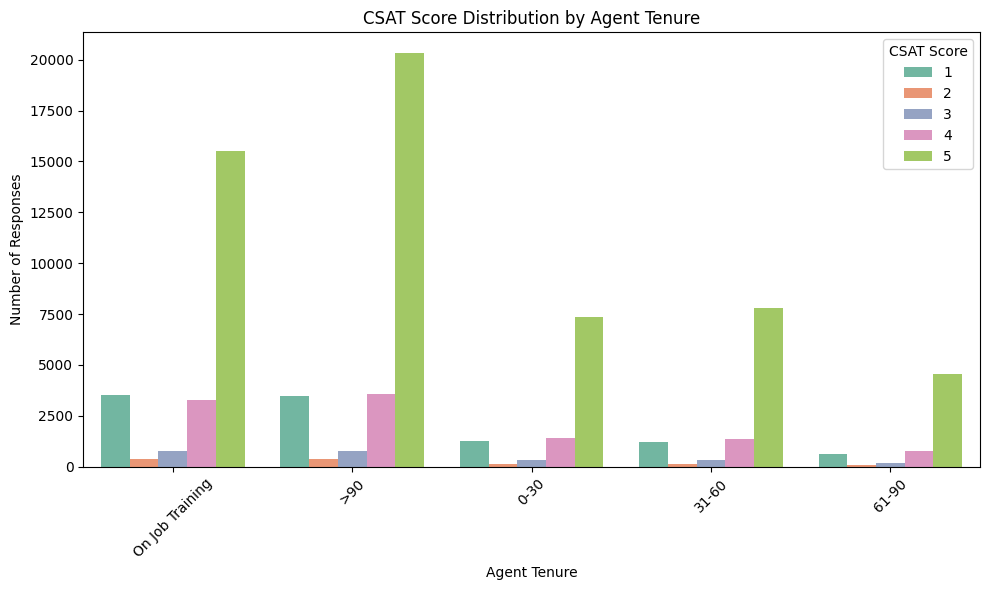

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Tenure Bucket', hue='CSAT Score', palette='Set2')
plt.title("CSAT Score Distribution by Agent Tenure")
plt.xlabel("Agent Tenure")
plt.ylabel("Number of Responses")
plt.legend(title="CSAT Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Since I wanted to see the ratio of 1 star and 5 star among all tenure buckets more precisely, i developed this code too.

In [20]:
# Filter the DataFrame to include only CSAT scores of 1 and 5
csat_1_5_df = df[df['CSAT Score'].isin([1, 5])]

# Group by 'Tenure Bucket' and 'CSAT Score' and count the occurrences
tenure_csat_counts = csat_1_5_df.groupby(['Tenure Bucket', 'CSAT Score']).size().unstack(fill_value=0)

# Calculate the total count for each tenure bucket
tenure_counts = df['Tenure Bucket'].value_counts()

# Calculate the ratio of 1 and 5 CSAT scores for each tenure bucket
tenure_ratios = pd.DataFrame({
    'Ratio_CSAT_1': tenure_csat_counts[1] / tenure_counts,
    'Ratio_CSAT_5': tenure_csat_counts[5] / tenure_counts
})

# Display the ratios
print("Ratio of 1-star and 5-star CSAT Scores by Agent Tenure:")
display(tenure_ratios)

Ratio of 1-star and 5-star CSAT Scores by Agent Tenure:


,Ratio_CSAT_1,Ratio_CSAT_5
Tenure Bucket,,
0-30,0.119535,0.701876
31-60,0.112882,0.719314
61-90,0.101084,0.735565
>90,0.122126,0.712223
On Job Training,0.149471,0.660513


From this you can see that
* On Job Training have highest 1 star ratio and lowest 5 star ratio.
* 61-90 has the lowest 1 star rating and highest 5 star rating
* >90 has a 5 star rating lower than 31-90 period bucket just above the freshers and 30 day bucket and the second highest 1 star ratings just above the job training bucket

This helps to verify the claims below and disprove the myth/fact that CSAT and Experience are proportional



---



##### 1. Why did you pick the specific chart?

We chose the countplot to visualize how customer satisfaction (CSAT) scores vary across different agent tenure groups. This chart is ideal because it clearly shows both the volume and distribution of ratings (1 to 5) for each tenure bucket. It helps analyze whether agent experience level influences customer satisfaction, and whether newly onboarded or long-serving agents are performing better.

##### 2. What is/are the insight(s) found from the chart?

The chart revealed a few key patterns:

* Agents in the "On Job Training" bucket have higher proportions of 1-star ratings, suggesting a performance issue during the early onboarding phase.

* Interestingly, agents in the "61–90" day bucket appear to perform best, with fewer low ratings and more 5-star scores.

* However, the ">90" bucket (most experienced agents) still show a notable number of 1-star ratings indicating that longer tenure doesn’t automatically lead to better performance, and may require ongoing feedback or training.

Overall, mid-tenure agents (61–90) seem to hit a performance sweet spot.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights are highly actionable. They suggest that:

* Early-stage agents (especially trainees) may benefit from more structured mentoring or support to avoid poor customer experiences.

* Mid-tenure agents can be studied further to replicate their practices across other tenure groups.

* For experienced agents with increasing 1-star ratings, complacency or fatigue might be affecting quality — regular feedback loops or refresher sessions can help.

Ignoring these patterns could lead to customer dissatisfaction during onboarding or agent burnout at later stages, both of which negatively impact service consistency and CSAT.

#### **9. Impact of CSAT w.r.t Agent Shift**

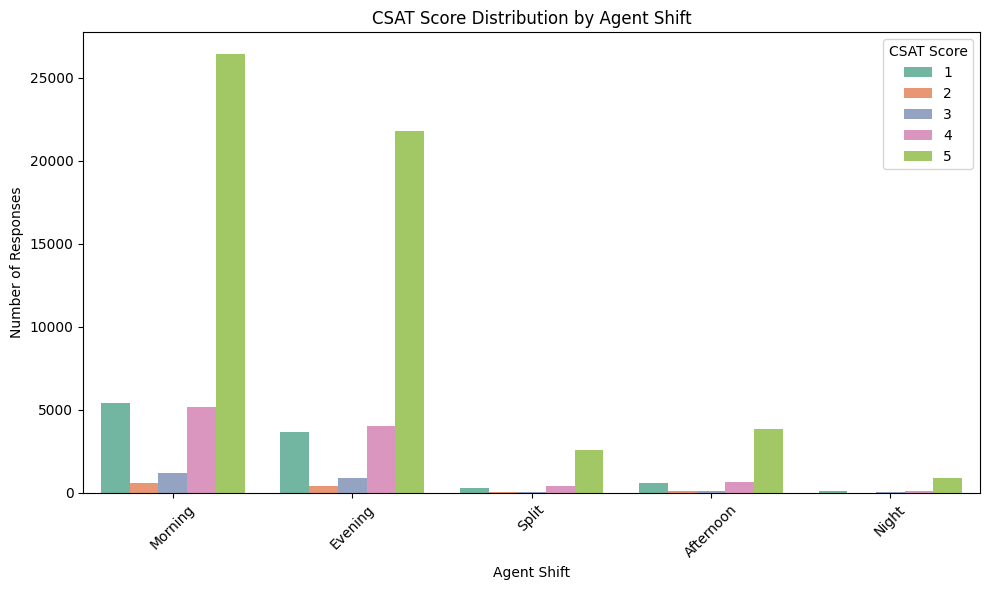

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Agent Shift', hue='CSAT Score', palette='Set2')
plt.title("CSAT Score Distribution by Agent Shift")
plt.xlabel("Agent Shift")
plt.ylabel("Number of Responses")
plt.legend(title="CSAT Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

We chose the countplot to visualize how CSAT scores vary across different agent shifts (Morning, Evening, and Night). This chart allows us to easily compare the volume of customer ratings received during each shift and analyze how agent availability and time of day might influence customer satisfaction. It’s effective for spotting shift-wise service quality trends that might not be obvious from summary statistics.

##### 2. What is/are the insight(s) found from the chart?

The chart revealed that:

* Morning and Evening shifts handle the majority of customer interactions, with both receiving high volumes of 5-star and 1-star ratings.

* Night shift has a significantly lower volume but shows more consistency, with relatively fewer 1-star ratings.

* The evening shift had slightly higher instances of 1-star ratings than other shifts, which might indicate issues like fatigue, agent overload, or lack of senior support during those hours.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights from this graph can lead to a positive business impact:

* Knowing which shifts receive more negative CSAT ratings allows the business to allocate better resources, such as senior agents, training, or backup support, to the affected time slots.

* The Night shift's consistency, despite fewer interactions, can be used as a benchmark to improve Morning and Evening shift processes.

If not addressed, the performance gap during peak shifts like Evening could lead to customer frustration and dissatisfaction, especially if issue resolution is rushed or inconsistent, a direct risk to CSAT and customer retention.

#### **10. Impact of CSAT w.r.t Handling Time**

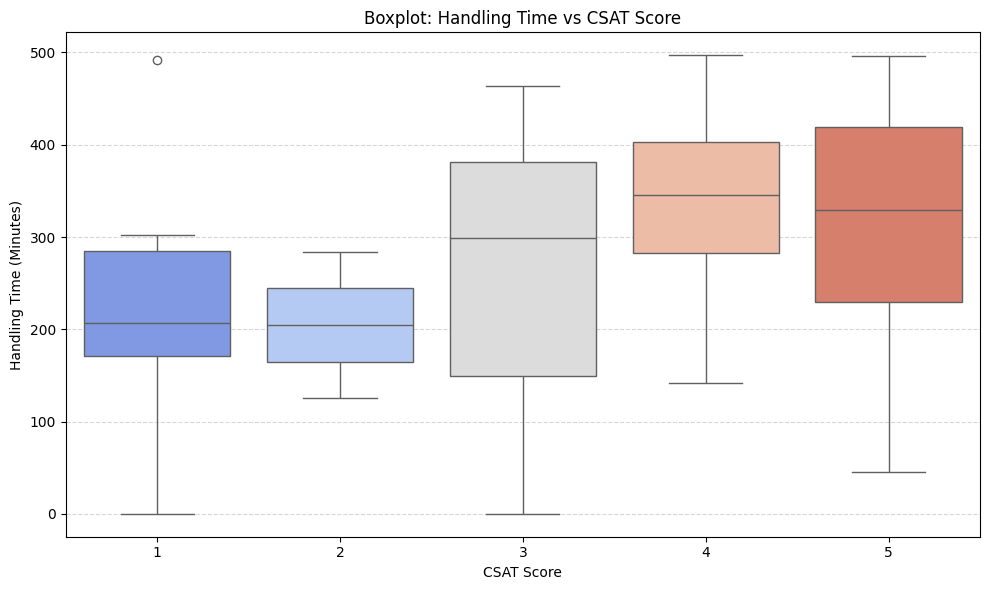

In [22]:
df_filtered = df[df['connected_handling_time'] <= 500]

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtered, x='CSAT Score', y='connected_handling_time', palette='coolwarm')
plt.title("Boxplot: Handling Time vs CSAT Score")
plt.xlabel("CSAT Score")
plt.ylabel("Handling Time (Minutes)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

We chose  boxplot because it allows us to clearly observe the distribution and spread of handling times across different CSAT score levels. It visualizes key statistical markers like the median, interquartile range, and outliers, helping us understand whether longer or shorter handling durations impact customer satisfaction.`

##### 2. What is/are the insight(s) found from the chart?

The boxplot reveals a few interesting findings:

* Tickets rated 3, 4, and 5 generally have higher median handling times compared to tickets rated 1 or 2.

* 1-star and 2-star rated tickets were resolved relatively quickly, suggesting that short handling time does not always indicate quality resolution.

* Higher CSAT scores (especially 5) have a wider spread of handling times, meaning customers were still satisfied even when the resolution took longer.

This shows that speed is not the only factor in customer satisfaction. Quality and Completeness of the resolution may matter more.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight can help businesses rethink how they measure support efficiency. Instead of pushing agents to close tickets faster, the focus should shift toward effective resolution, even if it takes more time.

If misunderstood, the push for low handling time might lead to rushed or incomplete solutions, which could explain the low CSAT scores for some quickly closed tickets. This would result in negative customer experiences and potential churn, contributing to negative growth over time.

#### **11. Count of 1-Star CSAT Score by Tenure Bucket**

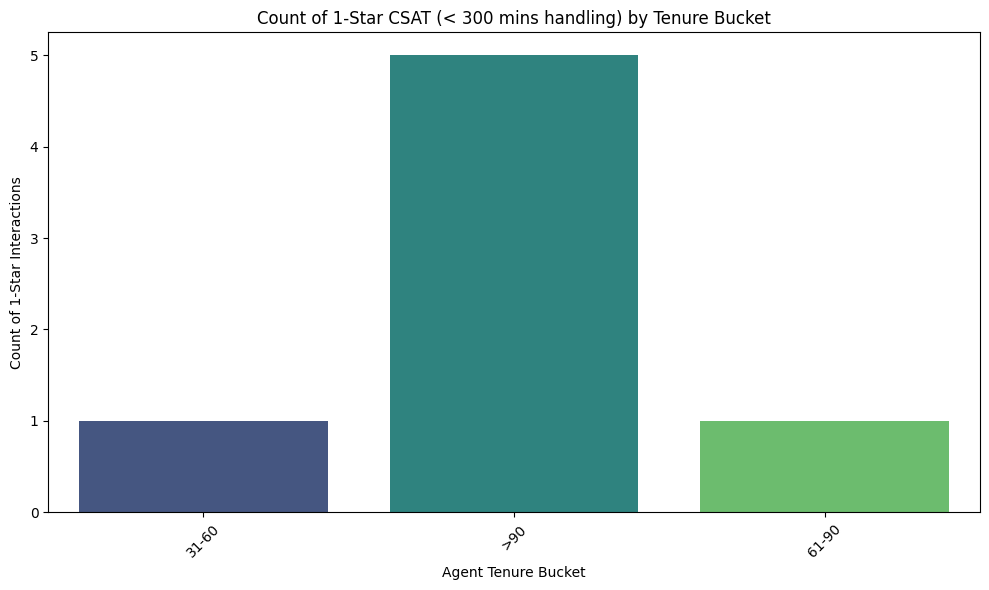

In [23]:
# Lets filter the dataframe for 1-star CSAT scores and handling time less than 300 minutes and plot a graph
low_csat_short_handling = df[(df['CSAT Score'] == 1) & (df['connected_handling_time'] < 300)]

plt.figure(figsize=(10, 6))
sns.countplot(data=low_csat_short_handling, x='Tenure Bucket', palette='viridis')
plt.title('Count of 1-Star CSAT (< 300 mins handling) by Tenure Bucket')
plt.xlabel('Agent Tenure Bucket')
plt.ylabel('Count of 1-Star Interactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

We selected this countplot because it focuses on a very specific and critical scenario — 1-star CSAT ratings for cases that had short handling times (< 300 mins), broken down by agent experience (tenure bucket). This helps isolate instances where customers were unhappy despite the interaction being resolved quickly, pointing to quality issues rather than speed problems. It's a strategic chart for understanding where fast but poor service might be happening.

##### 2. What is/are the insight(s) found from the chart?

From the chart, we can see that:

* Agents in the ">90 days" tenure group contributed to the majority of short-handled 1-star ratings.

* Surprisingly, mid-experience groups like "31–60" and "61–90" had fewer such cases, suggesting they may handle quick resolutions more effectively.

* This challenges the common assumption that more experience always equals better performance — here, experienced agents are more likely to rush cases and leave customers unsatisfied.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight is highly impactful. It indicates that:

* Even experienced agents may need reminders to prioritize quality, especially when working through tickets quickly.

* Targeted retraining for long-tenured agents can help reduce rushed and poorly resolved interactions.

If ignored, this could lead to negative growth, especially if loyal customers are served by experienced agents but still receive dissatisfying resolutions, which can damage trust more than if it came from a new hire.

#### **12. Impact of CSAT w.r.t Bottom Supervisors Perfomance**

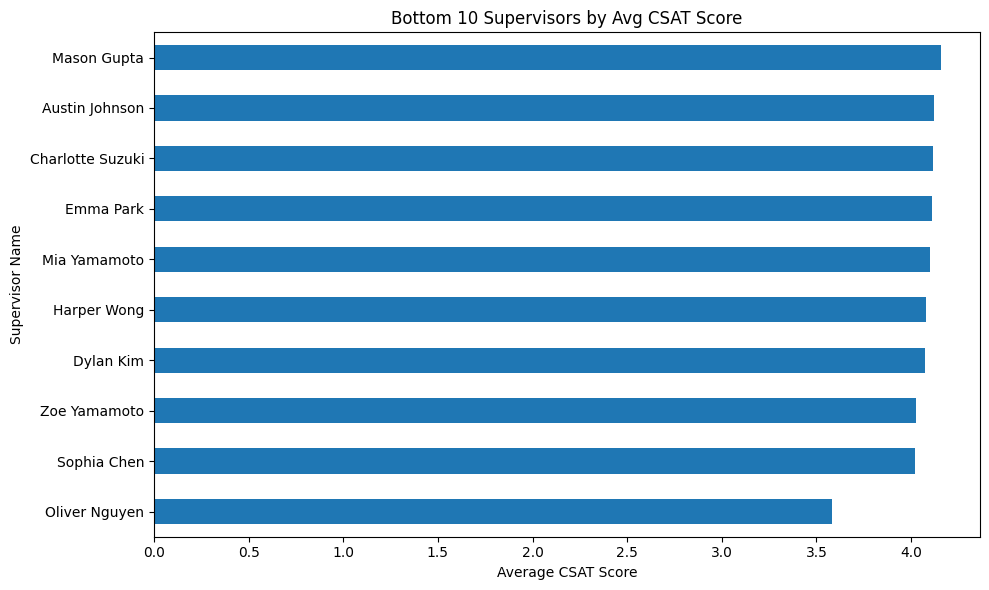

In [24]:
# Group by Supervisor and calculate the mean CSAT Score
supervisor_csat = df.groupby('Supervisor')['CSAT Score'].mean()

# Sort in ascending order to find bottom performers and select the top 10
bottom_supervisors = supervisor_csat.sort_values(ascending=True).head(10)

# Create a horizontal bar plot for the bottom 10 supervisors
plt.figure(figsize=(10, 6))
bottom_supervisors.plot(kind='barh')
plt.title('Bottom 10 Supervisors by Avg CSAT Score')
plt.xlabel('Average CSAT Score')
plt.ylabel('Supervisor Name')
plt.tight_layout()
plt.show()

Everyone seems to be in a 4.0 or above range except for Oliver Nguyen, let's analyze him in detail

In [25]:
# Lets filter the dataframe for the supervisor 'Oliver Nguyen'
olivers_agents = df[df['Supervisor'] == 'Oliver Nguyen']

# Now lets get the agents under this supervisor
agents_on = olivers_agents['Agent_name'].unique()
print("Agents under Supervisor Oliver Nguyen:")
for agent in agents_on:
    print(agent)

Agents under Supervisor Oliver Nguyen:
Christopher Mcintosh
Willie Flores
Laura Allen
Rebecca Miller
James Chung
Nicole Zavala


These are the agents under the supervision of Oliver Nguyen. Lets see their perfomance by analyzing their average CSAT scores, it should provide a better view of Oliver's Supervision.

In [26]:
# Lets group the data by Agent_name and calculate the mean CSAT Score for each agent
agentO_csat = olivers_agents.groupby('Agent_name')['CSAT Score'].mean()
print("Average CSAT Score for each Agent under Supervisor Oliver Nguyen:")
display(agentO_csat)

Average CSAT Score for each Agent under Supervisor Oliver Nguyen:


,CSAT Score
Agent_name,
Christopher Mcintosh,4.159091
James Chung,4.010870
Laura Allen,3.568182
Nicole Zavala,2.250000
Rebecca Miller,1.857143
Willie Flores,2.500000


From this we can see that although Oliver has two good agents under him and the rest are doing very bad in terms of CSAT scores scoring 3.5 and below. Now it may be that Oliver has gotten unlucky in his agent choices but luck doesnt come in statistics and Oliver, as a supervisor is responsible for the CSAT scores of his agents and hence has to be taken into account and trained better or whatever may it be to improve the overall CSAT scores

##### 1. Why did you pick the specific chart?

We chose a horizontal bar chart to highlight the bottom 10 supervisors based on their average CSAT scores. This format is ideal for comparing supervisors with longer names and easily spotting which ones are consistently leading underperforming teams. It gives a clear view of performance gaps at the supervisory level, which is crucial for understanding leadership impact on customer satisfaction.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that:

* Certain supervisors are repeatedly associated with low average CSAT scores, and these are worth investigating further.


* One standout case is Oliver Nguyen, who appears in the bottom 10 list.

* A deeper dive into Oliver Nguyen’s team showed a mixed performance as some agents under him were performing fairly well, but others consistently received 1-star ratings, which significantly pulled down the supervisor’s average.

This suggests that the low CSAT is not necessarily due to the supervisor’s strategy alone, but rather a lack of targeted support for underperforming agents under their supervision.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can have a strong positive impact:

* By identifying low-performing supervisors, the business can introduce managerial training, performance reviews, or realignment of team structures.

* In the Oliver Nguyen case, instead of holding the supervisor solely accountable, a targeted intervention for specific agents under their team can lift the overall performance.

If these patterns are ignored, supervisors managing underperforming agents may continue to receive poor customer feedback, leading to negative customer experiences, increased churn, and deterioration of team morale and brand trust, ultimately contributing to negative business growth.



#### **13. Impact of CSAT w.r.t Top Supervisors Perfomance**

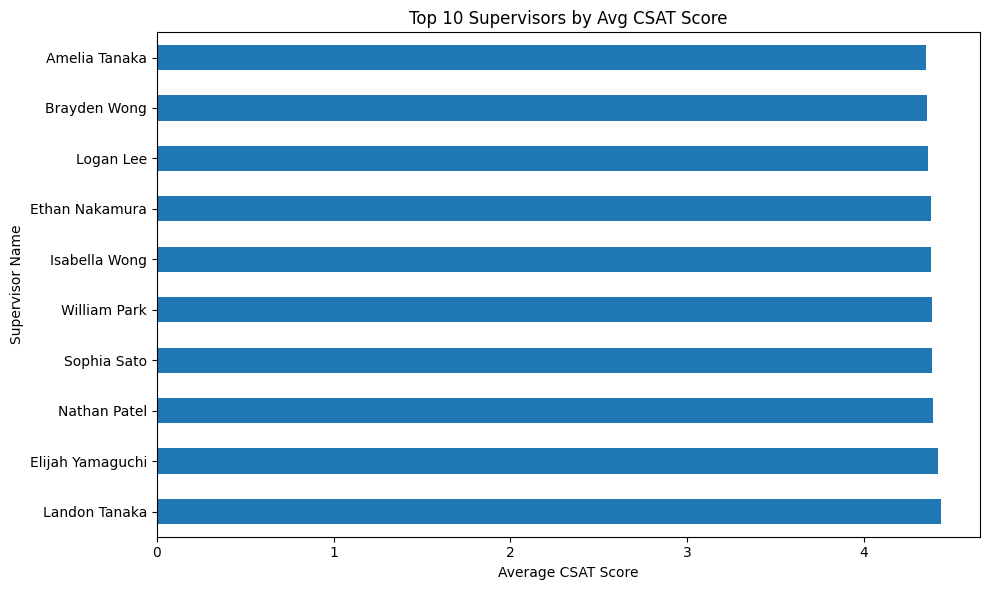

In [27]:
# Sort in descending order to find top performers and select the top 10
top_supervisors = supervisor_csat.sort_values(ascending=False).head(10)

# Create a horizontal bar plot for the top 10 supervisors
plt.figure(figsize=(10, 6))
top_supervisors.plot(kind='barh')
plt.title('Top 10 Supervisors by Avg CSAT Score')
plt.xlabel('Average CSAT Score')
plt.ylabel('Supervisor Name')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

We chose a horizontal bar chart to visualize the top 10 supervisors ranked by their average CSAT scores. This format makes it easy to compare supervisors with long names, and it clearly highlights those who consistently lead high-performing teams. It’s effective for recognizing leadership excellence and for identifying strategies worth replicating across the organization.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that:

* The top-performing supervisors maintain average CSAT scores very close to 5, which reflects strong leadership, effective agent mentoring, and consistent service quality.

* These supervisors likely manage agents who not only resolve issues effectively but also maintain customer empathy and communication standards.

* Their performance sets a benchmark for CSAT excellence and helps differentiate leadership styles that produce better customer outcomes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights are valuable for creating a strong positive business impact:

* High-performing supervisors can be leveraged as role models and may be involved in cross-training other teams or in developing best practices frameworks.

* Understanding what works in their teams (e.g., shift scheduling, escalation handling, coaching style) can be scaled across the company.

Ignoring their contributions could result in missed opportunities for wider improvement, and failure to recognize these leaders could demotivate top performers. This could eventually lead to retention issues or stagnation in CSAT growth, indirectly contributing to negative outcomes.



#### **14. Additional Research**

Since the >90 Tenure Bucket had poor perfomance and lower CSAT scores compared to the 31-90 bucket, I wanted to see who their supervisor was so that maybe I can find a correlation between the variables and pinpoint out the main issue causing high 1-star ratings.

In [28]:
# Filter the DataFrame for agents in the ">90" tenure bucket
experienced_agents_df = df[df['Tenure Bucket'] == '>90']

# Group by Supervisor and calculate the mean CSAT Score for these experienced agents
supervisor_csat_experienced = experienced_agents_df.groupby('Supervisor')['CSAT Score'].mean()

# Display the average CSAT score for experienced agents under each supervisor
print("Average CSAT Score for Experienced Agents (>90 Tenure) by Supervisor:")
display(supervisor_csat_experienced.sort_values(ascending=False).tail())

Average CSAT Score for Experienced Agents (>90 Tenure) by Supervisor:


,CSAT Score
Supervisor,
Charlotte Suzuki,3.931373
Sophia Chen,3.924242
Zoe Yamamoto,3.923789
Emma Park,3.639937
Oliver Nguyen,3.584000


These are the supervisors handling the Experienced Agents and all manage to keep up 3.9 which is a near 4 average CSAT score except for Emma Park and the before mentioned Oliver Nguyen. Training both of them and the agents under them would for sure bring a very drastic uplift in the CSAT scores. Lets get even deeper and circle out the agents who are perfoming bad in this bucket.

In [29]:
# Filter the DataFrame for agents in the ">90" tenure bucket (already have experienced_agents_df)

# Group by Agent_name and calculate the mean CSAT Score for experienced agents
agent_csat_experienced = experienced_agents_df.groupby('Agent_name')['CSAT Score'].mean()

# Sort in ascending order to find the worst performers and select the bottom 18
worst_experienced_agents = agent_csat_experienced.sort_values(ascending=True).head(18)

# Display the worst performing experienced agents and their average CSAT scores
print("Worst Performing Experienced Agents (>90 Tenure) by Avg CSAT Score:")
display(worst_experienced_agents)

Worst Performing Experienced Agents (>90 Tenure) by Avg CSAT Score:


,CSAT Score
Agent_name,
Rebecca Miller,1.857143
Philip Harmon,1.941176
Curtis Mccarthy,2.100000
Virginia Mccormick,2.129032
Nicole Zavala,2.250000
Wesley Meyer,2.259259
Charles Morales,2.281250
Tommy Davies,2.342857
Pamela Perez,2.382353


From this we can see all the bottom perfoming agents in the >90 Tenure Bucket. This can make the work easy for the company to target these individuals and retrain them and strengthen supervision around them and make sure they start perfoming well to bring on the significant increase in the CSAT scores.

## ***5. Hypothesis Testing***

### Hypothetical Statement

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis (H₀):
There is no significant difference in CSAT scores based on how long the issue was handled.
(Handling time does not affect customer satisfaction.)

* Alternate Hypothesis (H₁):
There is a significant difference in CSAT scores depending on handling time.
(Handling time does affect customer satisfaction.)

#### 2. Perform an appropriate statistical test.

In [30]:
import pandas as pd
from scipy.stats import f_oneway

# Step 1: Drop missing values in required columns
df_cleaned = df[['connected_handling_time', 'CSAT Score']].dropna()

# Step 2: Create handling time buckets
df_cleaned['handling_bucket'] = pd.cut(df_cleaned['connected_handling_time'],
                                       bins=[0, 10, 30, 60, 120, 300, 1000],
                                       labels=['0-10', '10-30', '30-60', '60-120', '120-300', '300-1000'])

# Step 3: Group CSAT scores by handling time bucket
groups = [group['CSAT Score'].values for _, group in df_cleaned.groupby('handling_bucket') if len(group) >= 2]

# Step 4: Run ANOVA
f_stat, p_value = f_oneway(*groups)

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")
if p_value < 0.05:
    print("There is a significant difference in CSAT scores depending on handling time")
else:
    print("There is no significant difference in CSAT scores depending on handling time")

F-statistic: 3.1406
P-value: 0.0453
There is a significant difference in CSAT scores depending on handling time


##### Which statistical test have you done to obtain P-Value?

One way ANOVA

##### Why did you choose the specific statistical test?

Because it allows us to compare CSAT scores across multiple handling time buckets

# **✅ Conclusion**

In this project, we performed a comprehensive analysis of the given customer support data to understand the key factors influencing Customer Satisfaction (CSAT) scores. The goal was to extract actionable insights that could help improve customer service operations and decision-making.

## Key Accomplishments

- **Data Cleaning and Preprocessing:**
  - Handled missing values by dropping incomplete rows for critical variables such as CSAT Score, response time, and handling time.
  - Outliers in connected handling time and response time were removed to normalize the data.
  - Log transformation was applied to skewed numerical features to stabilize variance.
  - Categorical encoding and feature scaling were used to prepare the dataset for further analysis.

- **Exploratory Data Analysis (EDA):**
  - A strong inverse relationship was observed between **response time** and CSAT score; faster responses tend to yield higher customer satisfaction.
  - **Email channels** performed worse in terms of CSAT compared to outbound and inbound calls.
  - **Agent performance** was highly variable: top-performing agents had consistent high CSAT scores, while bottom agents significantly underperformed.
  - **Manager and supervisor analysis** revealed performance variation between teams. In particular, some supervisors (like Oliver Nguyen) managed teams with highly inconsistent CSAT outcomes, indicating possible supervision or team training issues.
  - Analysis of **agent tenure** showed that agents with 61–90 days of experience had better CSAT distributions, while very experienced agents (>90 days) and agents in training had more 1-star ratings. This counterintuitive result suggests that tenure alone is not a guarantee of quality.
  - **Agent shift analysis** revealed that the Morning and Evening shifts received the highest number of interactions but also accounted for a greater proportion of 1-star scores. This suggests certain shifts may face higher workloads or more difficult interactions.
  - **Handling time** did not have a straightforward relationship with CSAT. While longer handling time did not guarantee higher CSAT, extremely short handling times were often associated with 1-star ratings, especially among trainees and experienced agents, possibly indicating rushed or incomplete service.

- **Statistical Testing:**
  - Hypothesis testing using One-Way ANOVA confirmed that both response time and tenure bucket had statistically significant effects on CSAT score.
  - These tests validated the insights from the visual EDA.

## Business Insights

- Prioritize reducing response times across all support channels to increase satisfaction.
- Focus on quality assurance for **email support**, which underperforms compared to other channels.
- Provide targeted support and coaching to underperforming agents and supervisors.
- Reevaluate experienced agents and ensure they maintain service quality over time.
- Investigate operational and workload-related issues across different **shifts** to prevent burnout or service inconsistency.
- Reassess training methods and onboarding, especially for agents within the first 30 days.

## Future Recommendations

- Implement real-time CSAT dashboards for managers to track team performance.
- Conduct regular training refreshers even for experienced agents.
- Explore customer feedback text data (if available) for sentiment analysis using NLP.
- Consider predictive modeling in the future to preemptively identify low-CSAT risk interactions (ML not implemented in this notebook).

This analysis offers the company
 valuable direction on optimizing support processes, personnel management, and strategic planning to enhance customer satisfaction.
